In [1]:
from utilities import *
from group_analysis_functions import extract_data_from_csv

C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#PATH 
screening_data = '../CreateStudy/screening_data.csv'
initial_path = '../CreateStudy'

In [3]:
data_dict = extract_data_screening_participant(screening_data)
# Access the healthy and stroke datasets separately
healthy_data = data_dict['H']
stroke_data = data_dict['S']

In [4]:
healthy_data, stroke_data

({'participant_id': array(['H001', 'H002', 'H003', 'H004', 'H005', 'H006', 'H007', 'H008',
         'H009', 'H010', 'H011'], dtype='<U4'),
  'age': array([26, 24, 33, 55, 32, 31, 64, 55, 64, 57, 64]),
  'dominant_hand': array(['right', 'right', 'right', 'right', 'right', 'right', 'right',
         'right', 'right', 'right', 'right'], dtype='<U5'),
  'affected_hand': array(['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
         'None', 'None', 'None'], dtype='<U4'),
  'ARAT_score': array(['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
         'None', 'None', 'None'], dtype='<U4')},
 {'participant_id': array(['S002', 'S003', 'S004'], dtype='<U4'),
  'age': array([70, 60, 29]),
  'dominant_hand': array(['right', 'right', 'right'], dtype='<U5'),
  'affected_hand': array(['left', 'left', 'right'], dtype='<U5'),
  'ARAT_score': array(['None', '3', '57'], dtype='<U4')})

In [5]:
healthy_age_array = healthy_data['age']
stroke_age_array = stroke_data['age']
stroke_arat_score = stroke_data['ARAT_score']

In [6]:
stroke_arat_score

array(['None', '3', '57'], dtype='<U4')

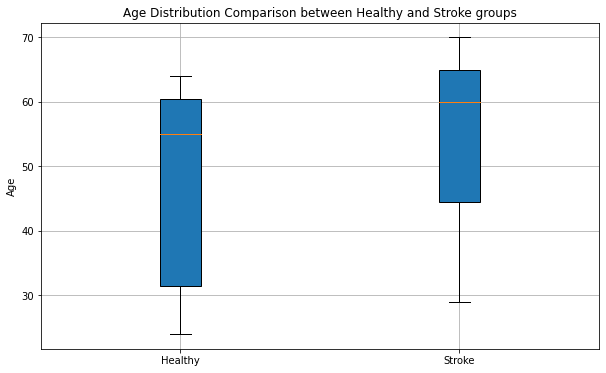

In [7]:
# Plot Boxplot
side_by_side_box_plot(healthy_age_array, stroke_age_array, labels=['H', 'S'], x_axis_labels=['Healthy', 'Stroke'])

In [8]:
## CORRELATION ## 

In [9]:
# For Healthy Group 
# Get the AC thresholds
participant_group = 'H'
csv_file_names = ['optimal_threshold_AC.csv', 'optimal_threshold_GM.csv']
# Get the  csv file paths for each participant 
csv_files_dict = find_specific_csv_files(initial_path, csv_file_names, participant_group)
optimal_threshold_AC_path =  csv_files_dict['optimal_threshold_AC.csv']
optimal_threshold_GM_path = csv_files_dict['optimal_threshold_GM.csv']
# Get the optimal thresholds from the csv file paths 
group_optimal_threshold_AC_NDH, group_optimal_threshold_AC_DH = extract_data_from_csv(optimal_threshold_AC_path)
group_optimal_threshold_GM = extract_data_from_csv(optimal_threshold_GM_path)

In [10]:
group_optimal_threshold_AC_NDH

[2.4, 13.5, 26.38, 169.86, 25.01, 64.31, 107.3, 33.46, 17.96]

In [11]:
## FIX THIS ## 
# Remove the last element since analysis not done yet
healthy_age_array_temp = healthy_age_array[:-2]

Correlation is not statistically significant (p >= 0.05)


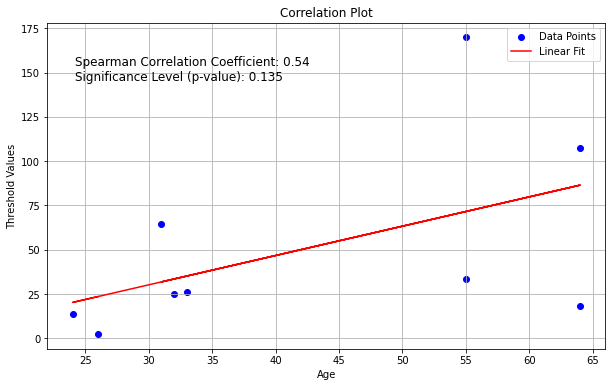

Correlation is not statistically significant (p >= 0.05)


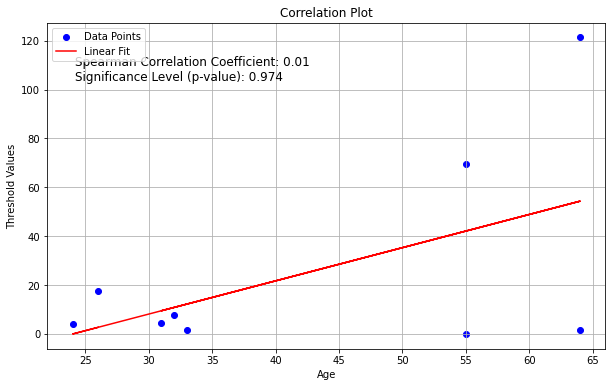

In [12]:
# Plot correlation figures 
plot_correlation(healthy_age_array_temp, group_optimal_threshold_AC_NDH, x_value='Age')
plot_correlation(healthy_age_array_temp, group_optimal_threshold_AC_DH, x_value='Age')

In [13]:
# For Stroke Group 
# Get the AC thresholds
participant_group = 'S'
csv_file_names = ['optimal_threshold_AC.csv', 'optimal_threshold_GM.csv']
# Get the  csv file paths for each participant 
csv_files_dict = find_specific_csv_files(initial_path, csv_file_names, participant_group)
stroke_optimal_threshold_AC_path =  csv_files_dict['optimal_threshold_AC.csv']
stroke_optimal_threshold_GM_path = csv_files_dict['optimal_threshold_GM.csv']
# Get the optimal thresholds from the csv file paths 
stroke_group_optimal_threshold_AC_NDH, stroke_group_optimal_threshold_AC_DH = extract_data_from_csv(optimal_threshold_AC_path)
stroke_group_optimal_threshold_GM = extract_data_from_csv(optimal_threshold_GM_path)

In [14]:
# To test 
stroke_group_optimal_threshold_AC_NDH = stroke_group_optimal_threshold_AC_DH = [45,41,68]

In [15]:
stroke_age_array

array([70, 60, 29])

Correlation is not statistically significant (p >= 0.05)


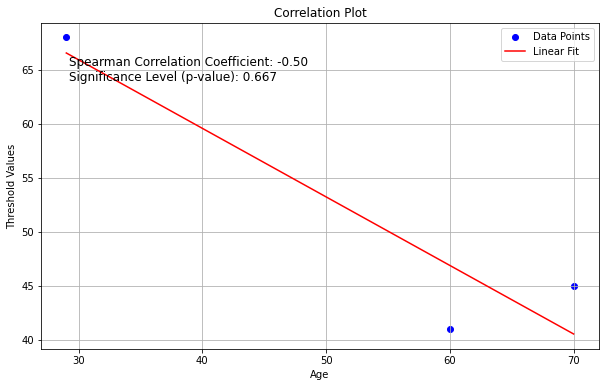

Correlation is not statistically significant (p >= 0.05)


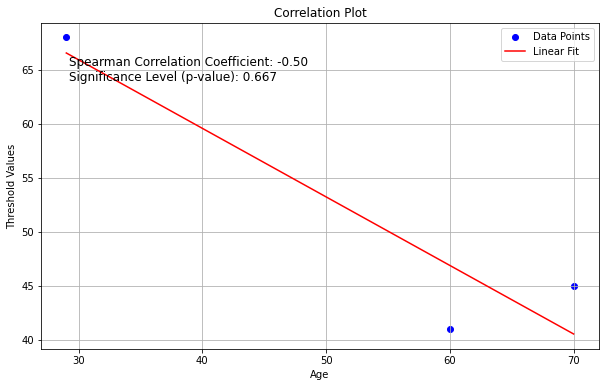

In [16]:
# Plot correlation figures 
plot_correlation(stroke_age_array, stroke_group_optimal_threshold_AC_NDH, x_value='Age')
plot_correlation(stroke_age_array, stroke_group_optimal_threshold_AC_DH, x_value='Age')
# plot_correlation(stroke_arat_score, stroke_group_optimal_threshold_AC_DH, x_value='ARAT Score')
# plot_correlation(stroke_arat_score, stroke_group_optimal_threshold_AC_NH, x_value='ARAT Score')